In [4]:
# Exploratory Analysis

In [5]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [23]:
nRowsRead = None # specify 'None' if want to read whole file
#df1 = pd.read_csv()
df1 = pd.read_csv("/Users/priyanshusankhala/Downloads/onehundred.csv", delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'companies_sorted.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 396 rows and 14 columns


In [ ]:
#df1 = pd.read_csv('../input/companies_sorted.csv', delimiter=',', nrows = nRowsRead)

In [17]:
df1.dataframeName = 'onehundred.csv'

In [18]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [19]:
df1.head()

,Company Name,Company url,Rank of page,Appeared in Title,Ttile and normalized(3),Number of words in company name appering in meta tag(4),"Number of words in company name appering in meta tag,normalized(5)",Levenshtein title and name(6),Levenshtein distance(Domain-Name)7,no. of links(8),Word Count(9),Does Company name apperars in html(10),Ratio of words in the site content to all links on the page(11),Response Variable
0,"""cecaci"" centro de capacitacion comercial e in...",linkedin.com,1,0.0,0,2.0,0.160,45,46,0.0,0.0,0,0.000000,0
1,3m health care,3m.com,1,1.0,1/3,1.0,0.333,21,11,0.0,0.0,1,0.000000,1
2,abb,global.abb,1,2.0,2,1.0,1.000,62,8,460.0,1640.0,1,3.565217,1
3,abbott,abbott.com,1,1.0,1,2.0,2.000,12,4,120.0,735.0,1,6.125000,1
4,abbvie,abbvie.com,1,1.0,1,1.0,0.000,41,4,203.0,1687.0,1,8.310345,1


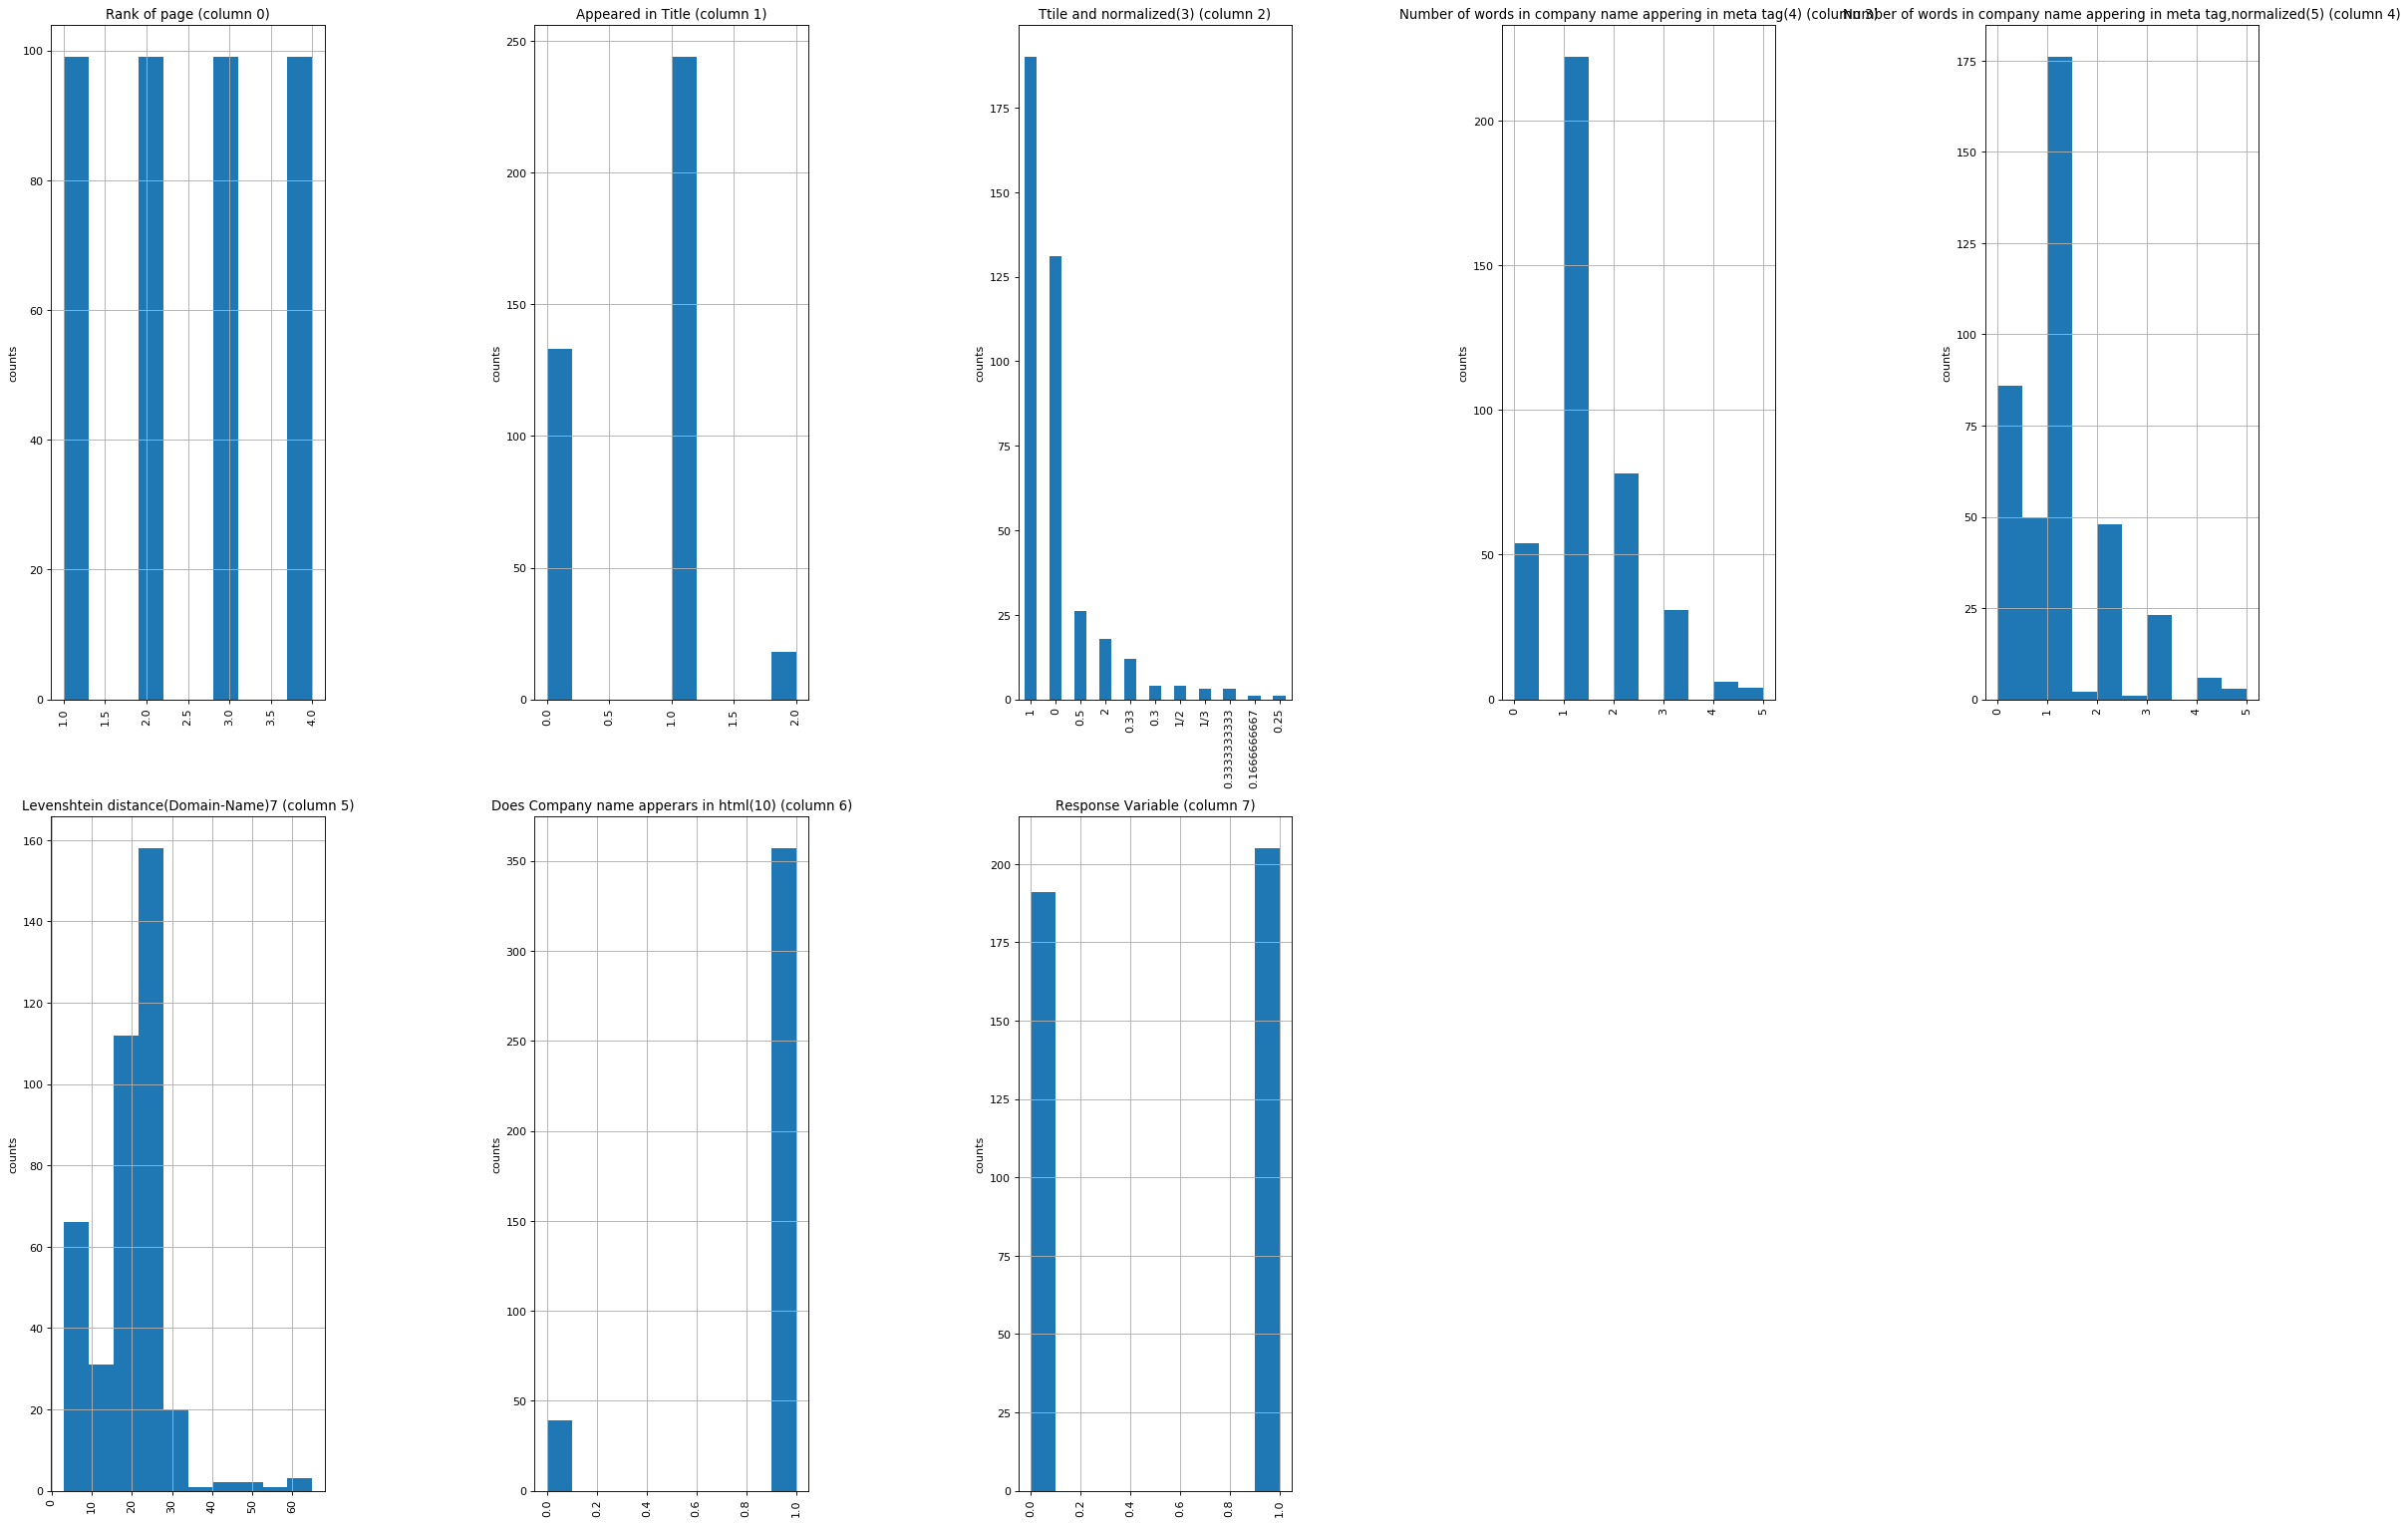

In [20]:
plotPerColumnDistribution(df1, 10, 5)

In [21]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

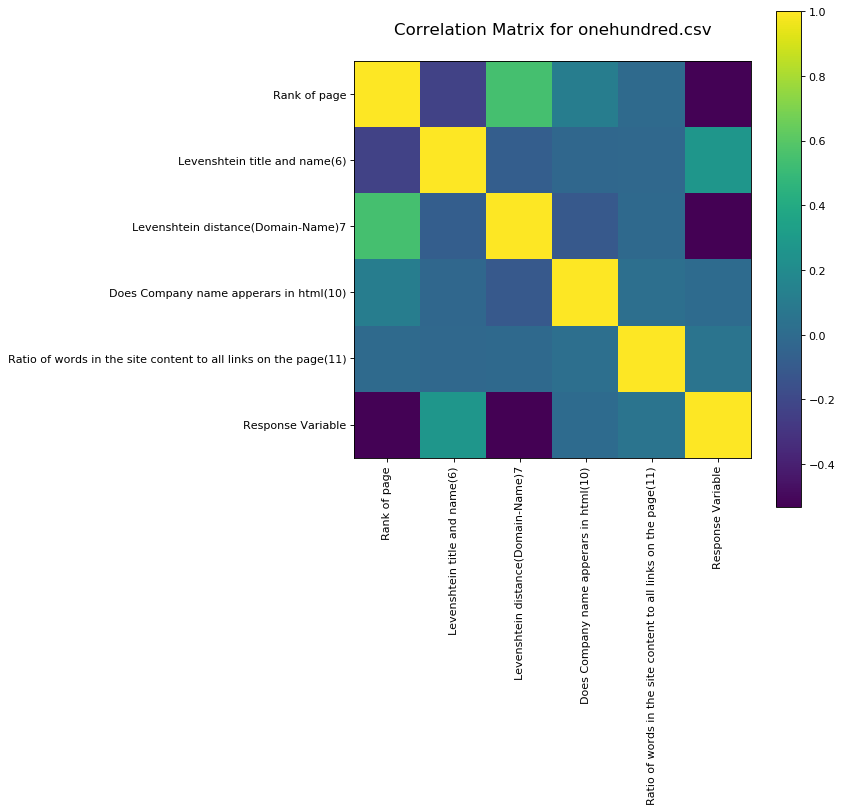

In [22]:
plotCorrelationMatrix(df1, 8)

In [24]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

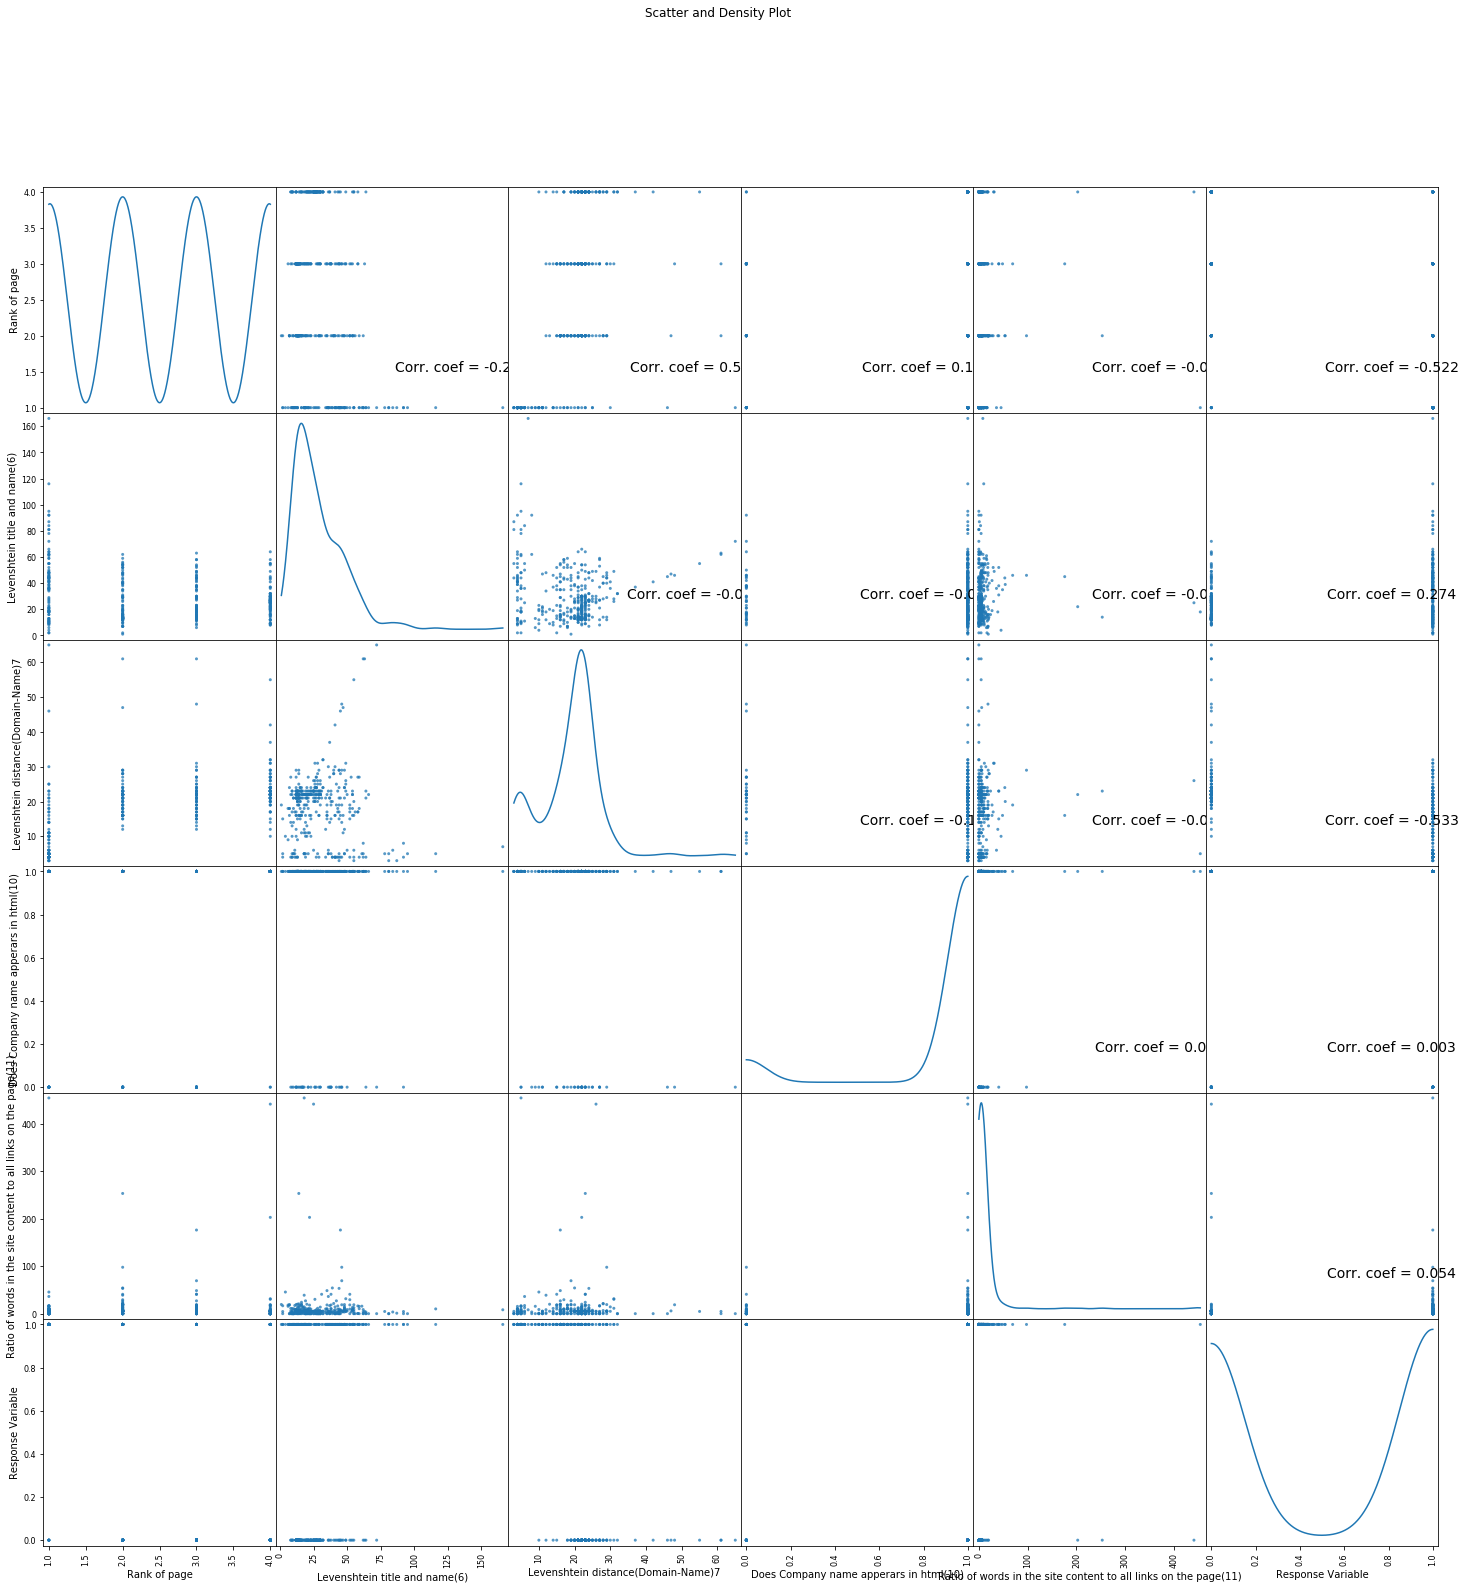

In [31]:
plotScatterMatrix(df1, 25, 14)